In [1]:
import numpy as np
import pandas as pd
# https://www.kaggle.com/datasets/shelvigarg/wine-quality-dataset
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/winequalityN.csv')
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4993,red,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6
733,white,6.6,0.25,0.30,14.4,0.052,40.0,183.0,0.9980,3.02,0.50,9.1,6
420,white,7.0,0.22,0.31,2.7,0.030,41.0,136.0,0.9898,3.16,0.37,12.7,7
2038,white,5.5,0.14,0.27,4.6,0.029,22.0,104.0,0.9949,3.34,0.44,9.0,5
1897,white,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.9966,2.90,0.41,8.9,6


In [2]:
# Check for missing values and then dropNA:
df = df.dropna()


In [3]:
df['is_white_wine'] = [
    1 if typ == 'white' else 0 for typ in df['type']]
df.drop('type', axis=1, inplace=True)

In [4]:
df['is_good_wine'] = [
    1 if quality >= 6 else 0 for quality in df['quality']
]
df.drop('quality', axis=1, inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine,is_good_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)
# trying to predict is good wine

In [6]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
import tensorflow as tf
tf.random.set_seed(42)

#sequential - creating 3 layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03), # set learning rate 
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


/opt/conda/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


162/162 [==============================] - 2s 5ms/step - loss: 0.6181 - accuracy: 0.7137 - precision: 0.7462 - recall: 0.8317
Epoch 2/100
162/162 [==============================] - 1s 5ms/step - loss: 0.5391 - accuracy: 0.7350 - precision: 0.7569 - recall: 0.8579
Epoch 3/100
162/162 [==============================] - 1s 4ms/step - loss: 0.5264 - accuracy: 0.7466 - precision: 0.7691 - recall: 0.8582
Epoch 4/100
162/162 [==============================] - 1s 4ms/step - loss: 0.5155 - accuracy: 0.7528 - precision: 0.7871 - recall: 0.8366
Epoch 5/100
162/162 [==============================] - 1s 4ms/step - loss: 0.5231 - accuracy: 0.7503 - precision: 0.7794 - recall: 0.8457
Epoch 6/100
162/162 [==============================] - 1s 4ms/step - loss: 0.5199 - accuracy: 0.7559 - precision: 0.7881 - recall: 0.8415
Epoch 7/100
162/162 [==============================] - 1s 4ms/step - loss: 0.5086 - accuracy: 0.7567 - precision: 0.8067 - recall: 0.8107
Epoch 8/100
162/162 [=========================

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [ ]:
# best way to tune learning rate: https://vimeo.com/710192188

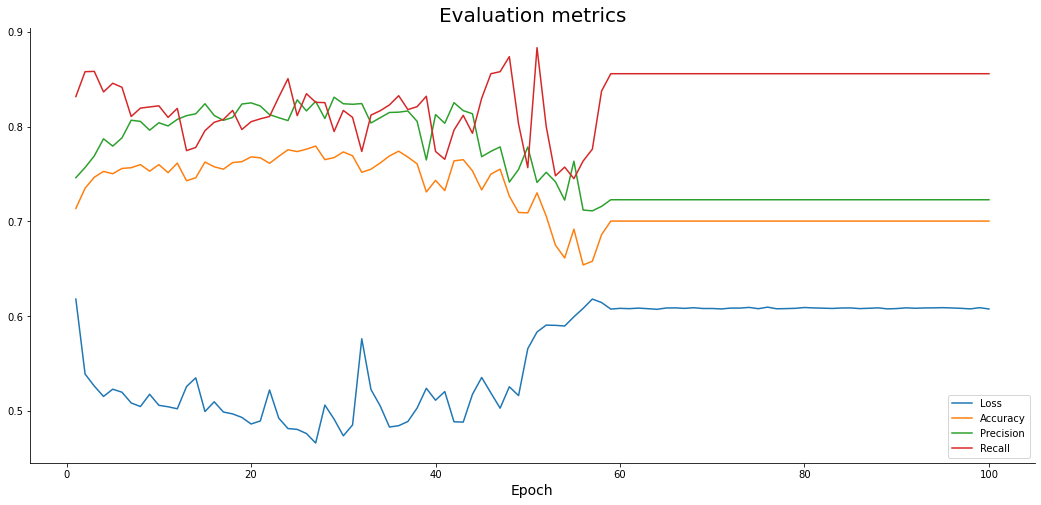

In [9]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [10]:
predictions = model.predict(X_test_scaled)

In [11]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]


In [12]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction_classes))

[[206 276]
 [102 709]]


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')


Accuracy: 0.71
Precision: 0.72
Recall: 0.87
